In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
data_dir = './data/'

In [5]:
df = pd.read_csv(data_dir+'train.csv')

In [6]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [8]:
df.shape

(42000, 785)

In [9]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
12264      4       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
12264       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
12264         0         0         0         0         0  

[1 rows x 785 columns]

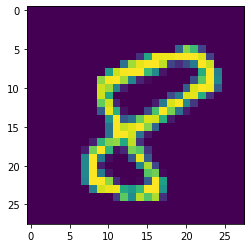

In [12]:
plt.imshow(df.iloc[18305,1:].values.reshape(28,28))
# we pick the element in 18305th row and we need to take columns of pixels from 1 onwards (not the label column)
#further it is aseries so we take values, and reshape into the image size of 28*28

In [13]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
X_train.shape

(33600, 784)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

9.109330892562866


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

<h3>We now use Principal Component Analysis </h3>

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)

In [25]:
X_train_trf = pca.fit_transform(X_train_std)
X_test_trf = pca.transform(X_test_std)

In [26]:
X_train_trf.shape

(33600, 100)

In [27]:
knn1 = KNeighborsClassifier()

In [28]:
knn1.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn1.predict(X_test_trf)

In [31]:
accuracy_score(y_pred, y_test)

0.9532142857142857

In [32]:
for i in range(1,784):
    pca = PCA(n_components = i)
    X_train_trf = pca.fit_transform(X_train_std)
    X_test_trf = pca.transform(X_test_std)
    
    knn1 = KNeighborsClassifier()
    knn1.fit(X_train_trf, y_train)
    
    y_pred = knn1.predict(X_test_trf)
    print(i,' ',accuracy_score(y_pred, y_test))
    
    

1   0.25761904761904764
2   0.3242857142857143
3   0.5101190476190476
4   0.6664285714285715
5   0.7380952380952381
6   0.8226190476190476
7   0.8433333333333334
8   0.8714285714285714
9   0.8869047619047619
10   0.9053571428571429
11   0.9113095238095238
12   0.9170238095238096
13   0.9269047619047619
14   0.9341666666666667
15   0.9379761904761905
16   0.9377380952380953
17   0.9403571428571429
18   0.9403571428571429
19   0.9414285714285714
20   0.9439285714285715
21   0.9436904761904762
22   0.9444047619047619
23   0.9460714285714286
24   0.9453571428571429
25   0.9488095238095238
26   0.9486904761904762
27   0.9473809523809524
28   0.9471428571428572
29   0.9495238095238095
30   0.9496428571428571
31   0.9513095238095238
32   0.9519047619047619
33   0.9515476190476191
34   0.9508333333333333
35   0.9520238095238095
36   0.9529761904761904
37   0.9528571428571428
38   0.9529761904761904
39   0.9522619047619048
40   0.9527380952380953
41   0.9529761904761904
42   0.9530952380952381


KeyboardInterrupt: 

<h3>Visualizing data using PCA</h3>

In [33]:
pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train_std)
X_test_trf = pca.transform(X_test_std)

In [34]:
X_train_trf

array([[-2.71863884, -0.48982838,  1.13531345],
       [-0.67700328, -6.75310425, -2.33515971],
       [-3.03321934,  6.50949642,  7.49213765],
       ...,
       [ 2.14882777,  0.78068828, -0.74780387],
       [ 1.05958295,  0.94734054,  3.94971958],
       [17.70262087,  1.96148196, -4.94291374]])

In [37]:
import plotly.express as px
y_train_trf = y_train.astype(str)

fig = px.scatter_3d(x = X_train_trf[:,0], #as the input is transformed in two axis, hence x has 0th row
                 y = X_train_trf[:,1], #hence y has 1st row
                 z = X_train_trf[:,2],
                 color = y_train_trf,
                 color_discrete_sequence = px.colors.qualitative.G10
)
fig.show()


In [38]:
pca.explained_variance_
#these are eigen values for the data reduced to 3d space
#each eigenvalue or lambda denotes that this PC can explain how much variance of the original data

array([40.67111198, 29.17023394, 26.74459568])

In [39]:
pca.components_
#these are the top 3 eigen vectors

array([[ 3.65538444e-19, -1.83476465e-18,  8.90565227e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.23084261e-17, -6.51821128e-17,  5.56225627e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 8.02087629e-18,  5.87070040e-18,  2.10880820e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [40]:
pca.components_.shape
#originally we had 784 axis, hence the covariance metrix will have 784 components, 
#hence eigenvetor will have 784 components. we take into 3d space hence choose 3 such vectors giving shape as 3,784

(3, 784)

In [46]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_std)
X_test_trf = pca.transform(X_test_std)

In [47]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [48]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

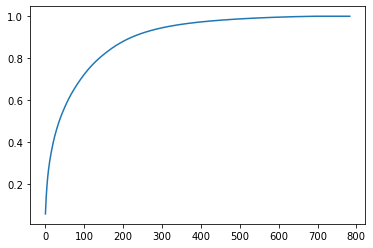

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))